<a href="https://colab.research.google.com/github/souvikjana9993/Data-Analysis/blob/master/OTOCAPITAL_ASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip uninstall seaborn -y
!pip install seaborn

Uninstalling seaborn-0.7.1:
  Successfully uninstalled seaborn-0.7.1
    100% |████████████████████████████████| 215kB 27.6MB/s 


In [0]:
#importing and reading data
import pandas as pd
import numpy as np
df=pd.read_excel('/content/cars.xlsx',sheet_name=1)
# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
df.head(5)

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,12000,1,8.5,8.8,5.378497e+05,338352.0,37.091715
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,68000,1,5.0,7.3,6.138627e+05,189200.0,69.178775
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,31143,1,6.2,4.6,6.783586e+05,347568.0,48.763381
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,6000,1,8.5,7.9,2.228480e+06,1629250.0,26.889645
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,100000,2,4.3,9.9,4.537194e+05,86240.0,80.992656


In [0]:
df.columns

Index(['MMV', 'Make', 'Model', 'Variant', 'Type', 'Fuel Type', 'Age',
       'Transmission', 'Color', 'Kms', 'No of Owner', 'Heath score',
       'price score', 'on road price', 'Current Price', 'Dep'],
      dtype='object')

In [0]:
#Checking for missing values
#no null values
df.isna().sum()

MMV              0
Make             0
Model            0
Variant          0
Type             0
Fuel Type        0
Age              0
Transmission     0
Color            0
Kms              0
No of Owner      0
Heath score      0
price score      0
on road price    0
Current Price    0
Dep              0
dtype: int64

# EXPLORATORY DATA ANALYSIS AND HYPOTHESIS TESTING

Hypothesis to be checked for?
1. Does Make of a Car affect the depreciation percentage?
2. Does Type of Car contibute to depreciation ?
3. We know Age should contribute to depreciation. Let's see what follows.
4. Understanding how health score and price score affect depreciation.
5. Relation between KMS and Depreciation

count    3879.000000
mean       54.342586
std        17.235352
min         2.071667
25%        42.215315
50%        55.280421
75%        67.248878
max        92.453905
Name: Dep, dtype: float64

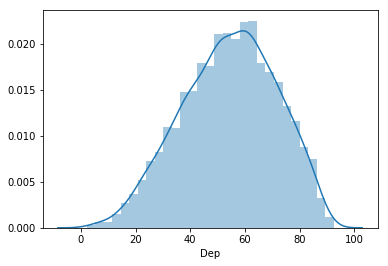

In [0]:
#The depreciation lies between 2% and 92% with a mean of 54 and median of 55. The distribution is approximately normally distributed with supposedly
#no outliers
sns.distplot(df['Dep']);
df['Dep'].describe()

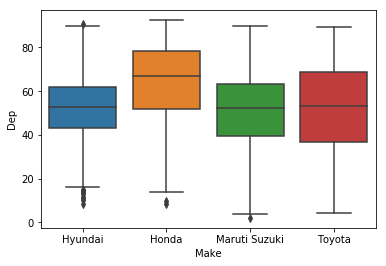

In [0]:
#checking hypothesis 1
sns.boxplot(x="Make", y="Dep",data=df);
#it can be said that Honda Cars have higher depreciation compared to the other 3 brands

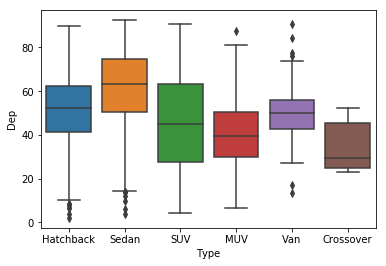

In [0]:
#sedans have higher depreciation compared to other types
sns.boxplot(x="Type", y="Dep",data=df);

In [0]:
#Checking for the Models with Highest Depreciation
result=df.groupby(['Model'])['Dep'].aggregate(np.median).reset_index().sort_values('Dep').tail(10)

In [0]:
#Top 10 models with highest depreciation
df.groupby(['Model'])['Dep'].aggregate(np.median).reset_index().sort_values('Dep').tail(10).reset_index().iloc[:,1:]

,Model,Dep
0,Accent,73.260432
1,Getz,74.213219
2,City Zx,76.060746
3,Camry,76.897173
4,Accord,78.361841
5,Civic,81.361467
6,Cr-V,82.534418
7,Corolla,83.301312
8,Land Cruiser,85.691026
9,Esteem,87.112224


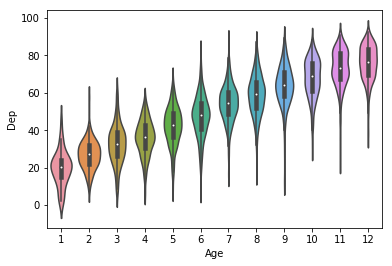

In [0]:
#quite obvious that old cars will have high depreciation
sns.violinplot(x="Age", y="Dep",data=df);

count       3879.000
mean      938142.449
std       584146.914
min       237274.731
25%       537849.665
50%       781928.080
75%      1120297.500
max     10954664.000
Name: on road price, dtype: float64

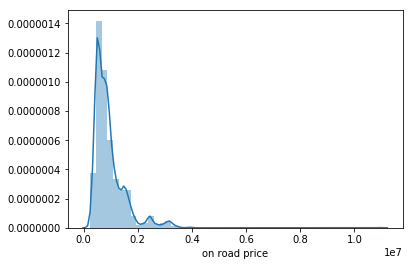

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.distplot(df['on road price']);
df['on road price'].describe()
#looks like there is a 1cr priced car.Lets look if it is an outlier or not

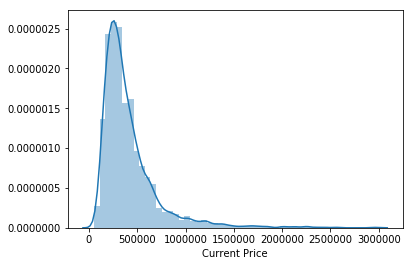

In [0]:
sns.distplot(df['Current Price']);
#the highest valued car is not an outler so we don't go for removing it. Instead lets shift it to 99th percentile for better model robustness

In [0]:
percentiles = df['on road price'].quantile([0.01,0.99]).values
df['on road price'][df['on road price'] >= percentiles[1]] = percentiles[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


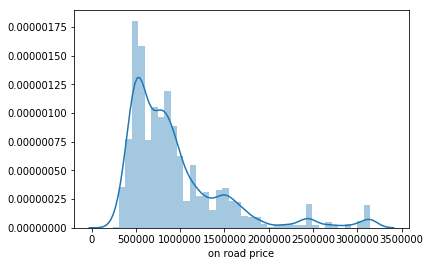

In [0]:
sns.distplot(df['on road price']);

In [0]:
percentiles = df['Current Price'].quantile([0.01,0.99]).values
df['Current Price'][df['Current Price'] >= percentiles[1]] = percentiles[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


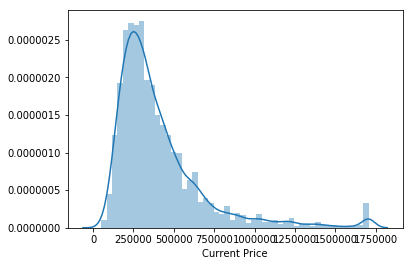

In [0]:
sns.distplot(df['Current Price']);

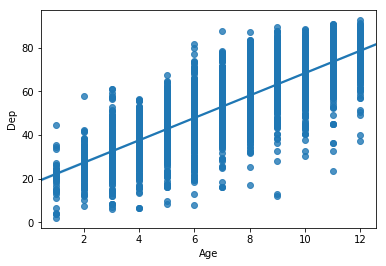

In [0]:
sns.regplot(x="Age", y="Dep", data=df);
#It is seen that older the car is more the depreciation

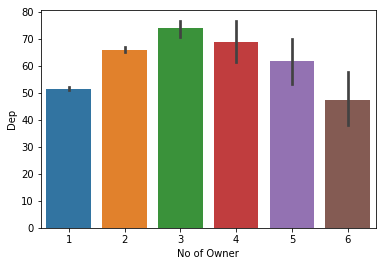

In [0]:
sns.barplot(x='No of Owner',y='Dep',data=df);

In [0]:
df.columns

Index(['MMV', 'Make', 'Model', 'Variant', 'Type', 'Fuel Type', 'Age',
       'Transmission', 'Color', 'Kms', 'No of Owner', 'Heath score',
       'price score', 'on road price', 'Current Price', 'Dep'],
      dtype='object')

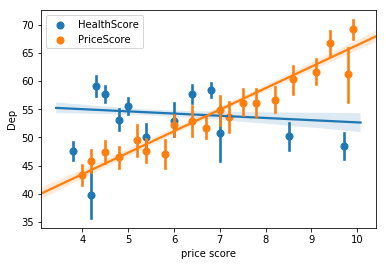

In [0]:
sns.regplot(x="Heath score", y="Dep", data=df, x_estimator=np.mean,x_bins=20, label="HealthScore")
sns.regplot(x="price score", y="Dep", data=df, x_estimator=np.mean,x_bins=20, label="PriceScore")
plt.legend();
#The better the healthscore lesser is the depreciation, on the other hand the higher the PriceScore more is the depreciation
#However,PriceScore is more significant for the variable depreciation than the Healthscore

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 16 columns):
MMV              3879 non-null object
Make             3879 non-null object
Model            3879 non-null object
Variant          3879 non-null object
Type             3879 non-null object
Fuel Type        3879 non-null object
Age              3879 non-null int64
Transmission     3879 non-null object
Color            3879 non-null object
Kms              3879 non-null int64
No of Owner      3879 non-null int64
Heath score      3879 non-null float64
price score      3879 non-null float64
on road price    3879 non-null float64
Current Price    3879 non-null float64
Dep              3879 non-null float64
dtypes: float64(5), int64(3), object(8)
memory usage: 485.0+ KB


# MODEL BUILDING - Data Preparation

In [0]:
df.columns

Index(['MMV', 'Make', 'Model', 'Variant', 'Type', 'Fuel Type', 'Age',
       'Transmission', 'Color', 'Kms', 'No of Owner', 'Heath score',
       'price score', 'on road price', 'Current Price', 'Dep'],
      dtype='object')

In [0]:
#we take only the features which we feel are relevant
df_model=df[['Make','Model','Variant','Color','No of Owner','Kms','Type','Transmission','Fuel Type','on road price']]
target=df['Dep']
noofowners=df['No of Owner']

In [0]:
df_model_num = df[['Kms','on road price']]
df_model_cat = df[['Make','Model','Variant','Color','Type','Transmission','Fuel Type']]

## One Hot Encoding and Scaling Numerical Variables

In [0]:
df_model_cat_ohe=pd.get_dummies(df_model_cat)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
#df_model_num=df_model_num.apply(lambda x:std.fit_transform(x))
df_model_num_scaled=pd.DataFrame(std.fit_transform(df_model_num),columns=df_model_num.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
df_model_cat_ohe=pd.get_dummies(df_model_cat)
df_prep1=pd.concat([df_model_cat_ohe,df_model_num_scaled],axis=1)


## Label Encoding and Scaling Numerical Variables

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df_model_cat_le=df_model_cat.astype('str').apply(LabelEncoder().fit_transform)
df_prep2=pd.concat([df_model_cat_le,df_model_num_scaled,noofowners],axis=1)
df_prep2.head()

,Make,Model,Variant,Color,Type,Transmission,Fuel Type,Kms,on road price,No of Owner
0,1,35,347,31,1,2,3,-0.971,-0.715,1
1,1,36,305,0,1,2,3,0.242,-0.578,1
2,1,36,347,31,1,2,3,-0.556,-0.461,1
3,1,44,61,24,4,1,1,-1.101,2.333,1
4,1,51,442,10,1,2,3,0.936,-0.866,2


# Model1- XGBOOST-Label Encoded-Objective Reg:Linear

In [0]:
#Preparing the data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_prep2,df['Dep'], test_size=0.20, random_state=42)

In [0]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [0]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train,y_train,early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 8.220057397735694


# Model2- XGBOOST-One Hot Encoded-Objective Reg:Linear

In [0]:
#Preparing the data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_prep1,df['Dep'], test_size=0.33, random_state=42)

In [0]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [0]:
X_train.columns

Index(['Make_Honda', 'Make_Hyundai', 'Make_Maruti Suzuki', 'Make_Toyota',
       'Model_800', 'Model_A-Star', 'Model_Accent', 'Model_Accord',
       'Model_Alto', 'Model_Alto 800',
       ...
       'Fuel Type_CNG', 'Fuel Type_Diesel', 'Fuel Type_LPG',
       'Fuel Type_Petrol', 'Fuel Type_Petrol + CNG', 'Fuel Type_Petrol + LPG',
       'Fuel Type_cng', 'Fuel Type_diesel', 'Kms', 'on road price'],
      dtype='object', length=606)

In [0]:
from xgboost import XGBRegressor
my_model = XGBRegressor(objective= 'reg:linear')
my_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 8.57217362876403


# MODEL1 PARAM Tuning

In [0]:
#Preparing the data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_prep2,df['Dep'], test_size=0.20, random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {'min_child_weight':[4,6], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
          'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

xgb = XGBRegressor(n_estimators=1000) 

grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train,early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

In [0]:
# make predictions
predictions = grid.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 8.251120642381373


# USING H2O

In [0]:
!pip -q install h2o


    100% |████████████████████████████████| 121.0MB 177kB/s 


In [0]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbjp917i0
  JVM stdout: /tmp/tmpbjp917i0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbjp917i0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_unknownUser_wdc8mh
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
df_modelc=pd.concat([df_model,target],axis=1)
df_modelH = h2o.H2OFrame(df_modelc)
df_modelH.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:3879
Cols:11




,Make,Model,Variant,Color,No of Owner,Kms,Type,Transmission,Fuel Type,on road price,Dep
type,enum,enum,enum,enum,int,int,enum,enum,enum,real,real
mins,,,,,1.0,863.0,,,,237274.731196,2.071667046955598
mean,,,,,1.2266047950502723,56812.58752255728,,,,938142.4493802116,54.34258619071732
maxs,,,,,6.0,854995.0,,,,10954664.0,92.4539045041615
sigma,,,,,0.5492304112569817,46163.39721552792,,,,584146.9138721139,17.23535171678547
zeros,,,,,0,0,,,,0,0
missing,0,0,0,0,0,0,0,0,0,0,0
0,Hyundai,I10,Sportz 1.2,White,1.0,12000.0,Hatchback,Manual,Petrol,537849.665431,37.09171507453382
1,Hyundai,I20,Magna (O) 1.2,Beige,1.0,68000.0,Hatchback,Manual,Petrol,613862.680246,69.17877465295987
2,Hyundai,I20,Sportz 1.2,White,1.0,31143.0,Hatchback,Manual,Petrol,678358.571604,48.76338052629532


In [0]:
# Identify predictors and response
x = df_modelH.columns
y = "Dep"
x.remove(y)

In [0]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=df_modelH)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190403_062115,97.5099,9.87471,97.5099,7.46287,0.240581
StackedEnsemble_BestOfFamily_AutoML_20190403_062115,97.9833,9.89865,97.9833,7.47844,0.241302
DeepLearning_grid_1_AutoML_20190403_062115_model_1,104.643,10.2295,104.643,7.72396,0.25239
DeepLearning_grid_1_AutoML_20190403_062115_model_2,105.445,10.2686,105.445,7.90092,0.246559
XGBoost_1_AutoML_20190403_062115,106.034,10.2973,106.034,7.80612,0.24967
DRF_1_AutoML_20190403_062115,108.633,10.4227,108.633,7.84116,0.25173
XGBoost_2_AutoML_20190403_062115,108.939,10.4374,108.939,7.91955,0.251232
XGBoost_grid_1_AutoML_20190403_062115_model_2,109.505,10.4645,109.505,7.8424,0.25151
GBM_1_AutoML_20190403_062115,110.53,10.5133,110.53,7.89812,0.256027
GBM_3_AutoML_20190403_062115,110.873,10.5296,110.873,7.91808,0.256374
